# Приоритизация гипотез и Анализ A/B-теста для увеличения выручки крупного интернет-магазина

**Контекст**  
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Приоритизация гипотез.

9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  
**Задача**  
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.  

**Описание данных**

Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

In [1]:
# блок загрузки необходимых библиотек

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy import stats as st
import math as mth

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
except:
    hypothesis = pd.read_csv(r'C:\Users\Дом\Desktop\dataset\hypothesis.csv', sep=',')

In [3]:
pd.options.display.max_colwidth = 120

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### **Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [43]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['ICE'] = hypothesis['ICE'].astype(int)

hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1


Наиболее перспективные гипотезы по ICE 8, 0, 7

### **Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [6]:
hypothesis['RICE'] = (hypothesis.reach * hypothesis.impact * hypothesis.confidence) / hypothesis.efforts
hypothesis['RICE'] = hypothesis['RICE'].astype(int)

hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40
8,"Запустить акцию, дающую скидку на товар в день рождения",16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


Наиболее перспективные гипотезы по RICE 7, 2, 0, 6

In [7]:
hypothesis.loc[7].hypothesis

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

### **Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.**

Наиболее перспективные гипотезы по ICE 8, 0, 7
Наиболее перспективные гипотезы по RICE 7, 2, 0, 6

На первое место вышла гипотеза 7 по RICE вместо 8 гипотезы по ICE, так произошло, из за того что 7 гипотеза имеет самый высокий  параметр reach (охват пользователей которых затронет изменение).
Гипотеза 0 хоть и имеет самый высокий параметр impacta (влияние на пользователей) но из-за низкого параметра reach = 3, занимает 3е место в позициях по фреймворку RICE.

**Таким образом наиболее приоритетной гипотезой для анализа является гипотеза с индексом 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**

## Анализ A/B-теста
    
**Данные для второй части**

**Файл /datasets/orders.csv**; 

transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  

**Файл /datasets/visitors.csv**;

date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста  

In [8]:
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
except:
    orders = pd.read_csv(r'C:\Users\Дом\Desktop\dataset\orders.csv', sep=',')
    visitors = pd.read_csv(r'‪C:\Users\Дом\Desktop\dataset\visitors.csv', sep=',')

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# смотрим на данные
display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [11]:
# check Nan
print(orders.isna().sum())
visitors.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


date        0
group       0
visitors    0
dtype: int64

In [12]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

Итого по предобработке данных.
Исходные данные качественные, дубликатов нет, пропусков нет. Тип данных приведен к нужным типам.

In [13]:
# create pivot
dupl_orders = orders.pivot_table(index='visitorId',values = 'group', aggfunc = 'nunique').reset_index()

print('Число пользователей находящихся одновременно в двух группах', dupl_orders.query('group == 2')['visitorId'].count())

Число пользователей находящихся одновременно в двух группах 58


In [14]:
dupl = dupl_orders.query('group == 2')['visitorId'].unique()
dupl.shape[0]

58

In [15]:
# число пользователей до удаления повторных
orders.shape[0]

1197

In [16]:
orders2 = orders.query('visitorId not in @dupl')

# число пользователей после удаления
orders2.shape[0]

1016

In [17]:
# доля изменения обьема датафрейма
(1 - (orders2.shape[0] / orders.shape[0])) * 100

15.121136173767757

**Пользователи находящихся одновременно в двух группах: за/против**

В выборке у нас есть целых **58 пользователей которые находятся сразу и в группе А и в группе В.**  
Если их удалить то - удаление может уменьшить выборку и повлиять на дальнейший анализ. А так же удалить из orders мы их можем, а вот из visitors мы таких не удалим, потому что данная выборка содержит уже агрегированный результат наблюдений.
Следовательно считаю разумных в данном случае их(пользователей находящихся одновременно в двух группах) оставить в данных.
Доля таких клиентов уменьшит всю выборку на 15%.
Но в голове будет держать что теперь у нас есть 2 датафрейма:
- Orders с повторками
- Orders2 - без повторяющихся пользователей.

Наличие таких пользователей тревожный знак. Значит А\А тест был проведен плохо, потому что Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. 

Значит, и результаты такого теста нельзя интерпретировать однозначно.

In [45]:
# Проверим имеющиеся распределения на нормальность критерием Шапиро-Уилка.

group_a_revenue = orders[orders['group']== 'A']['revenue']
group_b_revenue = orders[orders['group']== 'B']['revenue']

group_a_visitors = visitors[visitors['group']== 'A']['visitors']
group_b_visitors = visitors[visitors['group']== 'B']['visitors']

alpha = 0.05

list = [group_a_revenue, group_b_revenue, group_a_visitors, group_b_visitors]

for x in list:
    results = stats.shapiro (x)
    p_value = results[1]

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение  не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  1.739723833199812e-34
Отвергаем нулевую гипотезу: распределение  не нормально
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение  не нормально
p-значение:  0.02919507585465908
Отвергаем нулевую гипотезу: распределение  не нормально
p-значение:  0.03644953668117523
Отвергаем нулевую гипотезу: распределение  не нормально


### **Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


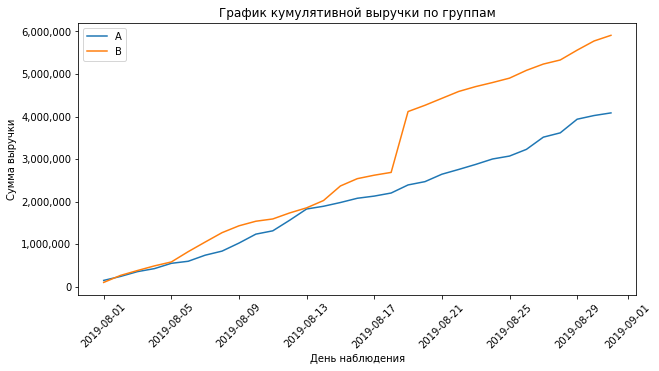

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,5))
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation = 45)
plt.xlabel('День наблюдения')
plt.ylabel('Сумма выручки')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');

plt.legend(); 

Выручка группы А растет равномерно в течении всего периода.  
Выручка группы В в точке 18.08.2019 имеет резкий вслеск. Это может сигнализировать о всплесках числа заказов либо о появлении дорогих заказов в выборке.

### **Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

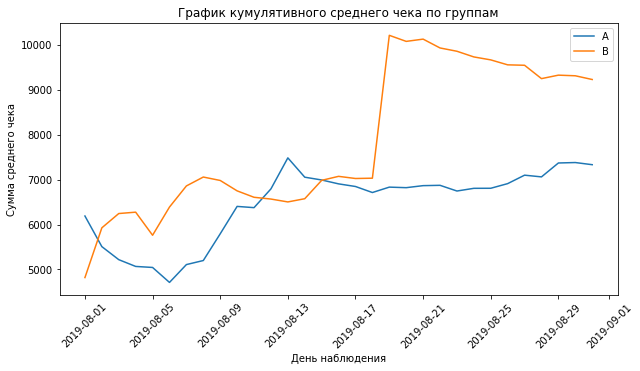

In [21]:
plt.figure(figsize=(10,5))
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation = 45)
plt.xlabel('День наблюдения')
plt.ylabel('Сумма среднего чека')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B');
plt.legend();

Средний чек группы В волнообразно возрастает. В точке 18.08.2019 наблюдается резкий рост с 7 000 до 10 000.  
Средний чек группы А имеет спад к точки 06.08.2019 После наблюдается рост. Резких скачков группы А не наблюдается. Ближе к концу средний чек становится равномерным на отметке в 7 000

### **Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

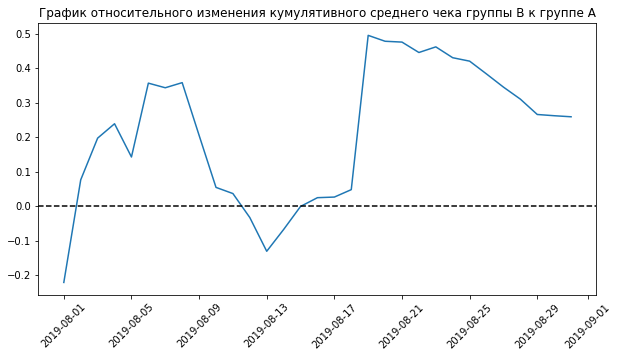

In [22]:
plt.figure(figsize=(10,5))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation = 45)

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']);

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1);

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

По графику Средний чек группы В отличается в большую сторону примерно на 25%.  
В нескольких точках график различия между сегментами резко «скачет». Это говорит о наличии аномалий и всплесках.

### **Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

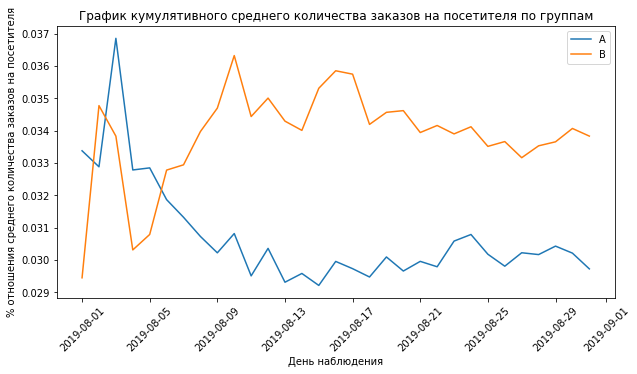

In [23]:
plt.figure(figsize=(10,5))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation = 45)
plt.xlabel('День наблюдения')
plt.ylabel('% отношения среднего количества заказов на посетителя')


# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A');
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B');
plt.legend();

В начале группы колебались, но затем конверсия группы В выросла и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### **Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

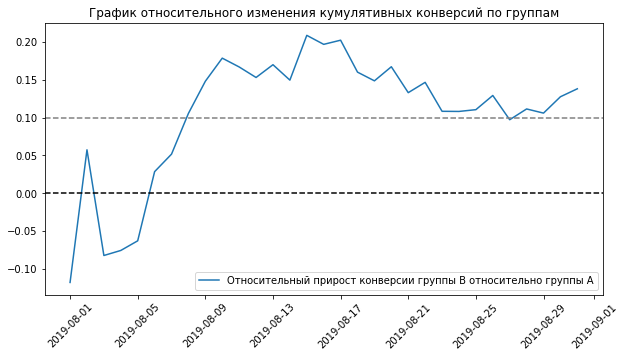

In [24]:
plt.figure(figsize=(10,5))
plt.title('График относительного изменения кумулятивных конверсий по группам')
plt.xticks(rotation = 45)

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A");
plt.legend();

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.1, color='grey', linestyle='--');

По графику относительного изменения кумулятивных конверсий по группам можно сказать что группа В сначала была хуже на 10 % но потом выросла и в итоге группа В относительно группы А больше  примерно 15%. На протяжении почти всего теста число заказов группы B была выше более чем на 10%

### **Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

In [25]:
# Сгруппируем данные по пользователямб и посчитаем колличество уникальных заказов на каждого пользователя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


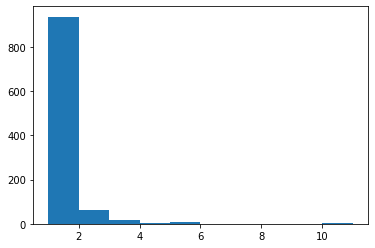

In [26]:
plt.hist(ordersByUsers['orders']);

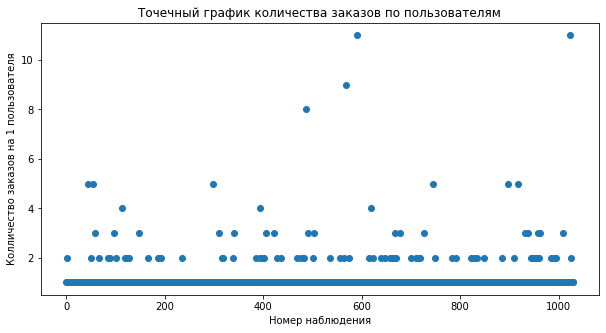

In [27]:
plt.figure(figsize=(10,5))
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Номер наблюдения')
plt.ylabel('Колличество заказов на 1 пользователя')


x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']);

Основная масса пользователей имеют 1 и 2 колличество заказов на одного пользователя.

### **Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [28]:
print(np.percentile(ordersByUsers['orders'], [95, 98, 99])) 

[2. 3. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И только 1% пользователей совершили 4 и более заказов.  
Будет разумным определить верхнюю границу числа заказов как 2 и отсеять аномальных пользователей по ней.

### **Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

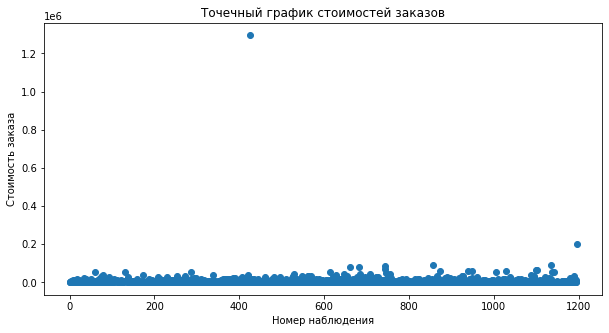

In [29]:
plt.figure(figsize=(10,5))
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Номер наблюдения')
plt.ylabel('Стоимость заказа')

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Из графика видно что только 2 заказа выбиваются из общей массы. Почти все заказы находятся в диапазоне до 200 000

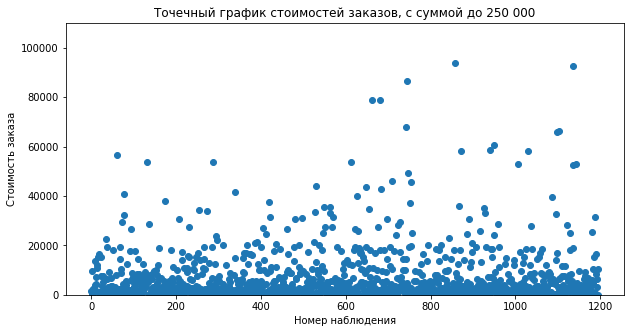

In [30]:
plt.figure(figsize=(10,5))
plt.title('Точечный график стоимостей заказов, с суммой до 250 000')
plt.xlabel('Номер наблюдения')
plt.ylabel('Стоимость заказа')
plt.ylim(0, 110000)

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

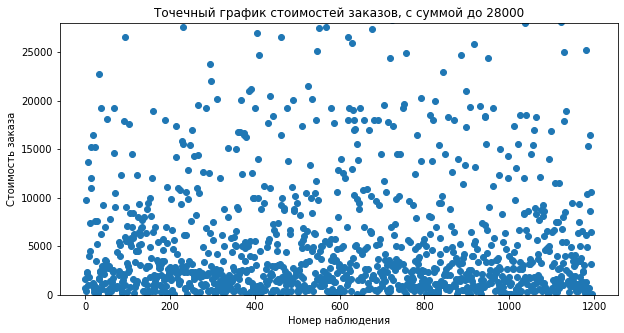

In [31]:
plt.figure(figsize=(10,5))
plt.title('Точечный график стоимостей заказов, с суммой до 28000')
plt.xlabel('Номер наблюдения')
plt.ylabel('Стоимость заказа')
plt.ylim(0, 28000)

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

### **Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [32]:
print(np.percentile(orders['revenue'], [95, 99, 99.89, 99.99]))

[  28000.           58233.2         168402.72000001 1163925.50399976]


99% пользователей имеют сумму заказа не больше 58 233.2  
95% пользователей - не больше 28 000

Границей аномальных заказов будем считать 28 000

### **Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

Сформулируем гипотезы.  
Нулевая: различий в среднем количестве заказов на посетителя между группами нет.  
Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.  

Использовать будем Непараметрический тест Уилкоксона-Манна-Уитни, для того что бы убрать влияние выбросов на результаты теста.

Главное отличие непараметрических методов в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.groupby('group').agg({'visitors': 'sum'}).visitors[0] - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.groupby('group').agg({'visitors': 'sum'}).visitors[1] - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


P-value = 0.017 меньше 0,05 значит отвергаем Нулевую гипотезу в пользу Альтернативной - группы различны.  
Т.е мы наблюдаем различия в среднем количестве заказов на посетителя между группами по «сырым» данным.  
Относительный выигрыш группы В равен 13,8%

### **Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

Нулевая гипотеза: различий в среднем чеке между группами нет.   
Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [34]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value = 0.729 что больше уровня стат.значимости 0,05. Причин отвергать нулевую гипотезу нет. А значит, различий в среднем чеке между группами нет.

Относительные различия в среднем чеке между группами: Средний чек группы В относительно группы А больше на 25.9%  
Существенная относительная разница при отсутствии статистической значимости указывает на влияние выбросов на метрику.

### **Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

Для очищения данных, напомним ранее обозначенные границы по аномальным значениям.

Колличество заказов для одного пользователя больше 2х
Сумма заказа более 28 000

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print()
print('Всего аномальных пользователей:',abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

Всего аномальных пользователей: 74


In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.groupby('group').agg({'visitors': 'sum'}).visitors[0] - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.groupby('group').agg({'visitors': 'sum'}).visitors[1] - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [37]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


Было 0.017 и 0.138  
Стало 0.013 и 0.173  

Результаты по среднему количеству заказов практически не изменились.

P-value = 0.013 меньше 0,05 значит мы все так же придерживаемся Альтернативной гипотезы - группы различны.  
Т.е мы наблюдаем различия в среднем количестве заказов на посетителя между группами по «очищенным» данным.  
Относительный выигрыш группы В увеличился до 17.3 %

### **Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

In [38]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


Было 0.729 и 0.259  
Стало 0.738 и -0.020  

Результаты частично изменились:  
P-value = 0.738  так и остался больше уровня стат.значимости 0,05. Причин отвергать нулевую гипотезу нет. А значит, различий в среднем чеке между группами по прежнему нет.

Относительные различия в среднем чеке между группами: Средний чек группы В стал хуже относительно группы А на 2 %, соедовательно аномалии действительно влияли на средний чек.

**Оценка влияния пользователей  пересекающихся по группам.**

Проанализируем как пересекающиеся пользователи по двум группам, могли повлиять на результаты теста.
Обратимся к датафрейму orders2 который хранит данные очищенные от пересекающихся пользователей.
Проведем аналогичные стат тесты и соотнесем результаты.

In [39]:
ordersByUsersA = (
    orders2[orders2['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders2[orders2['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.groupby('group').agg({'visitors': 'sum'}).visitors[0] - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.groupby('group').agg({'visitors': 'sum'}).visitors[1] - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.groupby('group').agg({'visitors': 'sum'}).visitors[0] - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.groupby('group').agg({'visitors': 'sum'}).visitors[1] - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.009
0.189


Различия в среднем количестве заказов на посетителя  
было 0.011 и 0.160  
стало 0.009 и 0.189  

In [41]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders2[orders2['group']=='A']['revenue'],\
                                          orders2[orders2['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders2[orders2['group']=='B']['revenue'].mean()/orders2[orders2['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


In [42]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders2[
                np.logical_and(
                    orders2['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders2[
                np.logical_and(
                    orders2['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders2[
            np.logical_and(
                orders2['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders2[
            np.logical_and(
                orders2['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.762
-0.022


/tmp/ipykernel_48/3894730692.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orders2[
/tmp/ipykernel_48/3894730692.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orders2[
/tmp/ipykernel_48/3894730692.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orders2[
/tmp/ipykernel_48/3894730692.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  / orders2[


Различия в среднем чеке заказа  
Было 0.829 и 0.287  
стало 0.762 и -0.022

Проанализируем как на результаты повлияло удаление пересекающихся пользователей.

**До удаления пересекающихся пользователей в двух группах:**
    
- Различия в среднем количестве заказов на посетителя  
Было 0.017(p-value) и 13,8 (относительное различие группы В к А, в %)  сырые  
Стало 0.013 и 17.3  очищенные  

- Различия в среднем чеке заказа  
Было 0.729 и 25.9  сырые  
Стало 0.738 и -2  очищенные  

**После удаления пересекающихся пользователей в двух группах:**

- Различия в среднем количестве заказов на посетителя  
Было 0.011 и 16.0  
Стало 0.009 и 18.9  

- Различия в среднем чеке заказа  
Было 0.829 и 28.7  
Стало 0.762 и -2.2 

Следовательно можно сделать вывод о том, что покупатели пересекающиеся по двум группам, не оказывают сильного влияния на полученные результаты статистических тестов. Данные изменения никак не изменили бы полученные результаты стат.тестов.

### **Примите решение по результатам теста и объясните его. Варианты решений:**

**Проанализируем имеющиеся факты:**
- Есть статистически значимые различия по среднему количеству заказов на посетителя между группами как по "сырым" так и по "очищенным" данным
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- По графику относительного изменения кумулятивных конверсий группа В относительно группы А лучше примерно 15%;
- По графику относительного изменения кумулятивного среднего чека группы В отличается в большую сторону примерно на 25%.  

Исходя из обнаруженных фактов вероятность того что группа А на самом деле лучше группы В крайне мала поэтому:

Необходимо Остановить тест, и зафиксировать победу группы В.